In [32]:
from pyforest import *

In [2]:
from catboost.datasets import amazon

df_train, df_test = amazon() 

In [3]:
print(df_train.shape)
print(df_test.shape)

(32769, 10)
(58921, 10)


In [4]:
df_train.head()

,ACTION,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
0,1,39353,85475,117961,118300,123472,117905,117906,290919,117908
1,1,17183,1540,117961,118343,123125,118536,118536,308574,118539
2,1,36724,14457,118219,118220,117884,117879,267952,19721,117880
3,1,36135,5396,117961,118343,119993,118321,240983,290919,118322
4,1,42680,5905,117929,117930,119569,119323,123932,19793,119325


In [5]:
df_test.head()

,id,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
0,1,78766,72734,118079,118080,117878,117879,118177,19721,117880
1,2,40644,4378,117961,118327,118507,118863,122008,118398,118865
2,3,75443,2395,117961,118300,119488,118172,301534,249618,118175
3,4,43219,19986,117961,118225,118403,120773,136187,118960,120774
4,5,42093,50015,117961,118343,119598,118422,300136,118424,118425


In [6]:
df_train.apply(lambda x: len(x.unique()))

ACTION                 2
RESOURCE            7518
MGR_ID              4243
ROLE_ROLLUP_1        128
ROLE_ROLLUP_2        177
ROLE_DEPTNAME        449
ROLE_TITLE           343
ROLE_FAMILY_DESC    2358
ROLE_FAMILY           67
ROLE_CODE            343
dtype: int64

In [7]:
df_train['MGR_ID'].value_counts()

770      152
2270      99
2594      82
1350      71
2014      67
        ... 
97000      1
81506      1
12517      1
50296      1
22355      1
Name: MGR_ID, Length: 4243, dtype: int64

In [8]:
df_train.isna().sum()

ACTION              0
RESOURCE            0
MGR_ID              0
ROLE_ROLLUP_1       0
ROLE_ROLLUP_2       0
ROLE_DEPTNAME       0
ROLE_TITLE          0
ROLE_FAMILY_DESC    0
ROLE_FAMILY         0
ROLE_CODE           0
dtype: int64

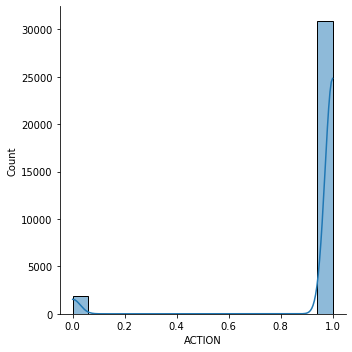

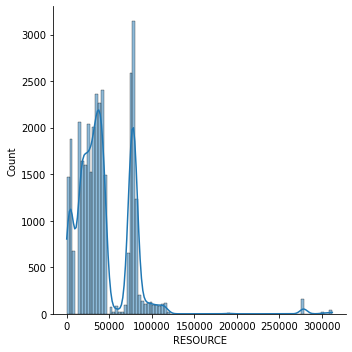

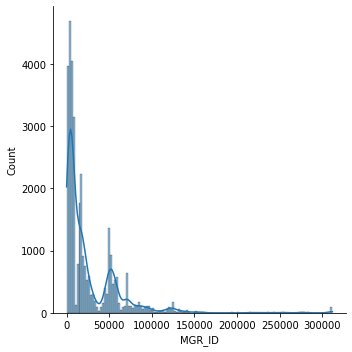

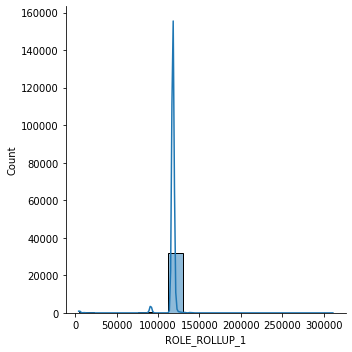

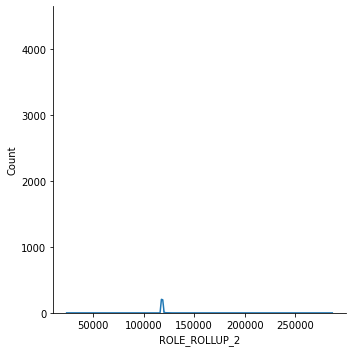

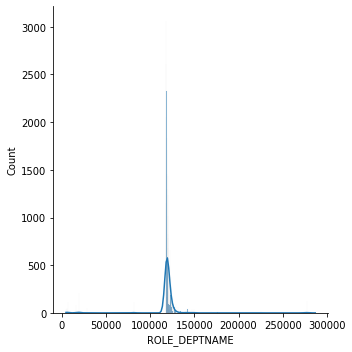

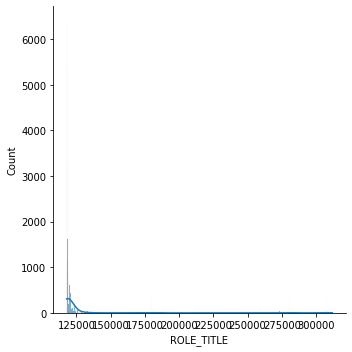

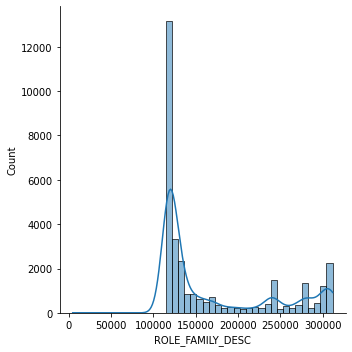

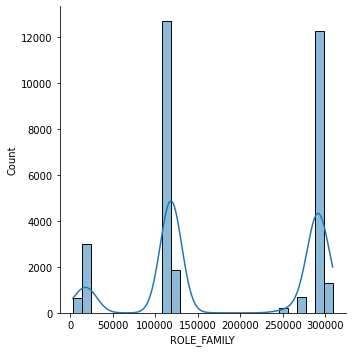

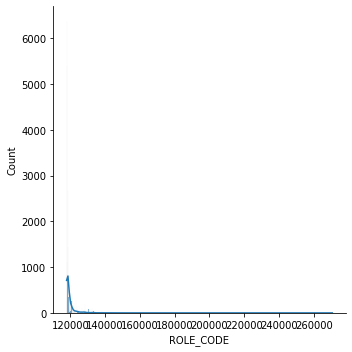

In [9]:
for i in df_train.describe().columns:
    sns.displot(df_train[i].dropna(), kde=True)
    plt.show()

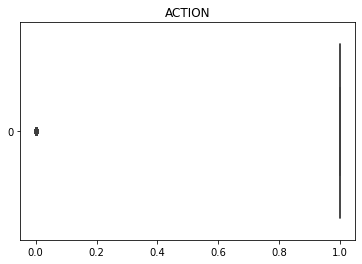

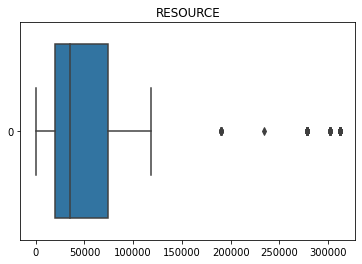

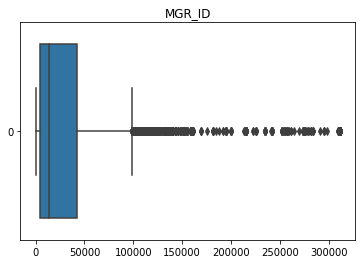

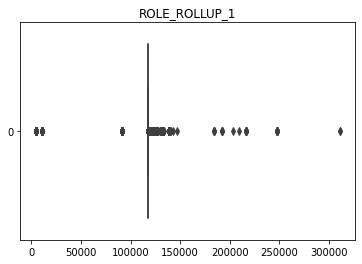

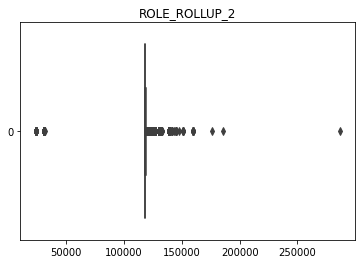

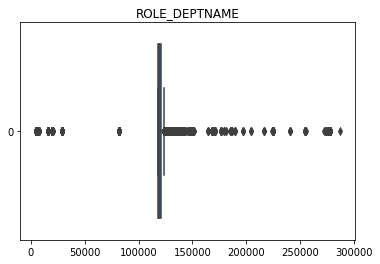

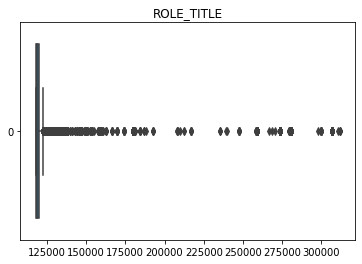

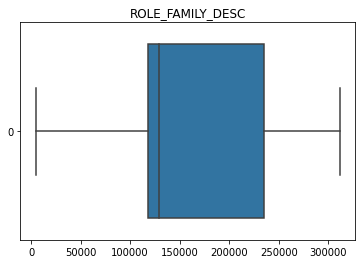

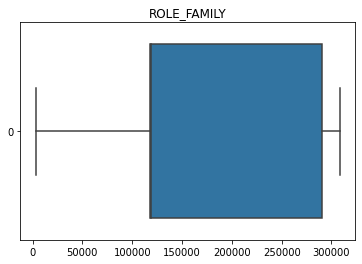

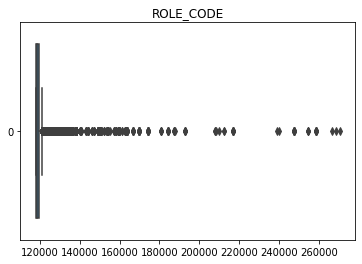

In [14]:
for i in df_train.describe().columns:
    sns.boxplot(df_train[i], orient='h')
    plt.title(df_train[i].name)
    plt.show()

In [15]:
df_train['ACTION'].value_counts()

1    30872
0     1897
Name: ACTION, dtype: int64

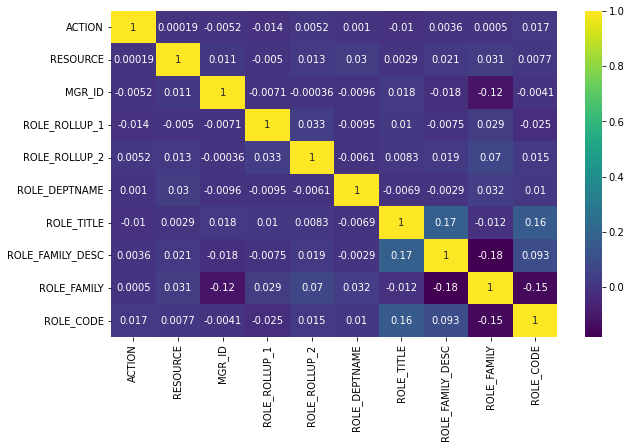

In [19]:
plt.figure(figsize=(10, 6))
sns.heatmap(df_train.corr(numeric_only=True), annot=True, cmap='viridis')
plt.show()

In [24]:
x = df_train.drop('ACTION', axis=1)
y = df_train['ACTION']
x_test = df_test.drop('id', axis=1)

In [25]:
from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size=0.25, random_state=1) 

In [27]:
%%time

from catboost import CatBoostClassifier

params = {
    'loss_function': 'Logloss',
    'eval_metric': 'AUC',
    'verbose': 200,
    'random_seed': 1
}
model = CatBoostClassifier(**params)
model.fit(x_train, y_train,
         eval_set=(x_valid, y_valid),
         use_best_model=True
         )

Learning rate set to 0.069882
0:	test: 0.5400959	best: 0.5400959 (0)	total: 170ms	remaining: 2m 49s
200:	test: 0.8020842	best: 0.8020842 (200)	total: 3.26s	remaining: 13s
400:	test: 0.8237941	best: 0.8237941 (400)	total: 6.35s	remaining: 9.49s
600:	test: 0.8328464	best: 0.8330283 (598)	total: 9.75s	remaining: 6.47s
800:	test: 0.8366271	best: 0.8370599 (785)	total: 13.5s	remaining: 3.36s
999:	test: 0.8417823	best: 0.8417823 (999)	total: 17.4s	remaining: 0us

bestTest = 0.8417823185
bestIteration = 999

CPU times: total: 35.2 s
Wall time: 18 s


In [28]:
categorical_features = list(range(x.shape[1]))
categorical_features

[0, 1, 2, 3, 4, 5, 6, 7, 8]

In [30]:
%%time

params = {
    'loss_function': 'Logloss',
    'eval_metric': 'AUC',
    'cat_features': categorical_features,
    'verbose': 200,
    'random_seed': 1
}
model = CatBoostClassifier(**params)
model.fit(x_train, y_train,
         eval_set=(x_valid, y_valid),
         use_best_model=True
         )

Learning rate set to 0.069882
0:	test: 0.5637606	best: 0.5637606 (0)	total: 161ms	remaining: 2m 40s
200:	test: 0.8963628	best: 0.8963782 (199)	total: 44.2s	remaining: 2m 55s
400:	test: 0.8989021	best: 0.8989325 (392)	total: 1m 28s	remaining: 2m 12s
600:	test: 0.8993557	best: 0.8998863 (511)	total: 2m 12s	remaining: 1m 27s
800:	test: 0.9009732	best: 0.9009732 (800)	total: 2m 55s	remaining: 43.6s
999:	test: 0.9002624	best: 0.9012478 (820)	total: 3m 37s	remaining: 0us

bestTest = 0.9012478381
bestIteration = 820

Shrink model to first 821 iterations.
CPU times: total: 5min 20s
Wall time: 3min 38s


In [34]:
from catboost import cv, Pool

params = {
    'loss_function': 'Logloss',
    'eval_metric': 'AUC',
    'verbose': 200,
    'random_seed': 1
}
total_train_data = Pool(data=x, label=y, cat_features=categorical_features)
scores = cv(pool=total_train_data,
            params=params,
            fold_count=4,
            seed=1,
            shuffle=True,
            stratified=True)

Training on fold [0/4]
0:	test: 0.5000000	best: 0.5000000 (0)	total: 28.8ms	remaining: 28.7s
200:	test: 0.8938231	best: 0.8938231 (200)	total: 40s	remaining: 2m 39s
400:	test: 0.8976768	best: 0.8976768 (400)	total: 1m 25s	remaining: 2m 7s
600:	test: 0.9012104	best: 0.9012104 (600)	total: 2m 10s	remaining: 1m 26s
800:	test: 0.9026744	best: 0.9029761 (755)	total: 2m 57s	remaining: 44.2s
999:	test: 0.9035036	best: 0.9035617 (989)	total: 3m 45s	remaining: 0us

bestTest = 0.9035617354
bestIteration = 989

Training on fold [1/4]
0:	test: 0.5000000	best: 0.5000000 (0)	total: 78.2ms	remaining: 1m 18s
200:	test: 0.8826904	best: 0.8827199 (199)	total: 44.8s	remaining: 2m 57s
400:	test: 0.8844538	best: 0.8844538 (400)	total: 1m 28s	remaining: 2m 12s
600:	test: 0.8851686	best: 0.8854438 (571)	total: 2m 14s	remaining: 1m 29s
800:	test: 0.8840131	best: 0.8854438 (571)	total: 3m 3s	remaining: 45.6s
999:	test: 0.8834802	best: 0.8854438 (571)	total: 3m 46s	remaining: 0us

bestTest = 0.8854438307
bestIt

In [35]:
feature_imp = model.get_feature_importance(prettified=True)
feature_imp

,Feature Id,Importances
0,RESOURCE,19.011684
1,ROLE_DEPTNAME,16.973756
2,MGR_ID,13.928303
3,ROLE_ROLLUP_2,13.316408
4,ROLE_TITLE,9.475144
5,ROLE_FAMILY_DESC,8.930017
6,ROLE_ROLLUP_1,8.178098
7,ROLE_FAMILY,7.388187
8,ROLE_CODE,2.798402


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'Catboost features importances')

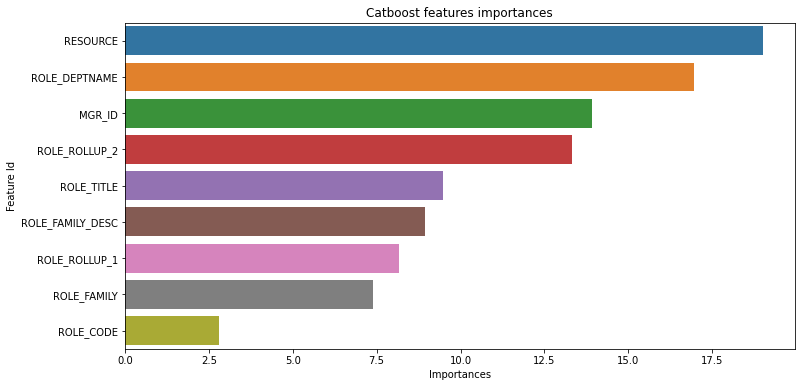

In [38]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Importances', y='Feature Id', data=feature_imp)
plt.title('Catboost features importances')

In [39]:
model.predict_proba(x_test)

array([[0.31746544, 0.68253456],
       [0.00971627, 0.99028373],
       [0.00720064, 0.99279936],
       ...,
       [0.00954754, 0.99045246],
       [0.03551281, 0.96448719],
       [0.011599  , 0.988401  ]])

In [40]:
model.predict(x_test)

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [41]:
predictions = model.predict(x_valid)

In [42]:
model.score(x_valid, y_valid)

0.9566703283290614

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

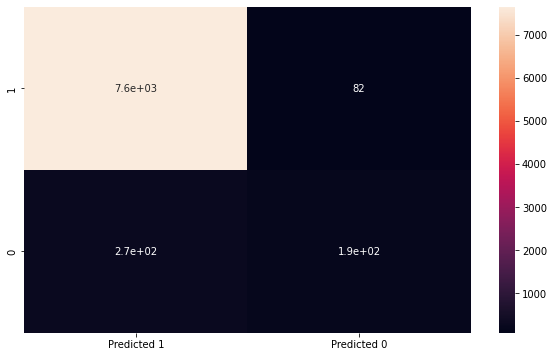

In [43]:
from sklearn import metrics

cm = metrics.confusion_matrix(y_valid, predictions, labels=[1, 0])
df_cm = pd.DataFrame(cm, index=[1, 0], columns=['Predicted 1', 'Predicted 0'])
plt.figure(figsize=(10, 6))
sns.heatmap(df_cm, annot=True)
plt.show()